In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [6]:
df = pd.read_csv('drive/Shareddrives/DS340W Project/PopularityPrediction-main/FACEBOOK FILES/merged_file_final_fb.csv')

In [7]:
to_drop = ['image_id', 'Facebook Id', 'Page Category', 'Page Name', 'Page Description', 'Page Created', 'Post Created',
           'Post Created Date', 'Type', 'Love', 'Wow', 'Haha', 'Sad', 'Angry' , 'Care',
           'Video Share Status', 'Is Video Owner?', 'Post Views', 'Total Views', 'Total Views For All Crossposts',
           'Video Length', 'URL', 'Message', 'Link', 'Final Link', 'Image Text', 'Link Text', 'Description', 'Sponsor Id',
           'Sponsor Name', 'Sponsor Category', 'Likes', 'Comments', 'Shares','User Name', 'Page Admin Top Country', 'Likes at Posting', 'Post Created Time',
           'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )']
#'Likes', 'Comments', 'Shares', 'Likes at Posting'

df = df.drop(to_drop, axis=1)
df = df.dropna()
df

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,...,Total Interactions,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,0,1,1,0,0,0,0,green,...,127,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,1,0,0,0,blue,...,312,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,1,2,0,0,0,1,grey,...,77,HIGH,0,0,0,0,0,1,0,0
3,0,1,0,1,1,0,0,0,0,purple,...,332,HIGH,0,1,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,grey,...,71,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,1,1,1,1,2,0,0,0,0,cyan,...,269,HIGH,0,1,0,0,0,1,0,0
2566,0,0,0,0,0,1,0,0,0,blue,...,211,LOW,0,0,0,0,0,0,0,0
2567,0,1,1,1,2,0,0,0,0,cyan,...,162,HIGH,0,1,0,0,0,0,0,0
2568,1,1,0,1,2,0,0,0,0,grey,...,133,HIGH,0,1,0,0,0,0,1,0


In [8]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')
    return df

In [9]:
df = change_types(df)

In [10]:
df.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
dominantColor,object


In [11]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0
mean,0.4,0.8,0.7,0.4,1.2,0.2,0.0,0.1,0.1,0.6,8070202.2,74754.6,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,12171064.1,387478.2,0.1,0.5,0.1,0.0,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7233.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,138347.2,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,865509.5,288.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,26164014.0,4240.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,29486754.0,5750308.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


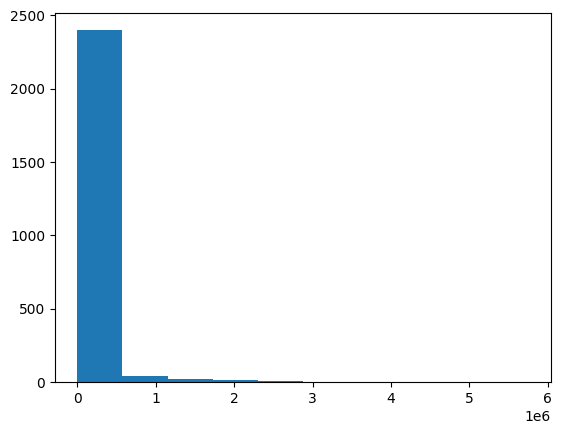

In [12]:
plt.hist(df['Total Interactions'], bins=10)
plt.show()

In [13]:
new_df = df[df['Total Interactions'] < df['Total Interactions'].quantile(0.90)]
# new_df = df[(df['Total Interactions'] < df['Total Interactions'].quantile(0.80)) & (df['Total Interactions'] > df['Total Interactions'].quantile(0.20))]
# plt.hist(new_df['Total Interactions'])

In [14]:
new_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0
mean,0.4,0.8,0.7,0.4,1.2,0.3,0.0,0.1,0.1,0.5,5904733.4,2043.8,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,10843759.2,4203.0,0.1,0.5,0.1,0.0,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7233.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,136067.2,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,396180.0,252.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1957430.8,640.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,29486754.0,21212.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
df[df['Total Interactions']>100000].count()

,0
Child,148
Smile,148
Female,148
Male,148
PeopleNumber,148
Text,148
close_up,148
Indoors,148
Outdoors,148
dominantColor,148


In [16]:
y = new_df['Total Interactions']
y = (y/new_df['Followers at Posting'])*1000
y

,0
0,1.739321
1,4.263926
2,1.051539
3,4.525442
4,0.967250
...,...
2565,1.760828
2566,1.379175
2567,1.055932
2568,0.856490


<ipython-input-17-8733ca3f5b98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


,0
count,2250.000000
mean,1.469823
std,3.565633
min,0.004986
25%,0.239178
50%,0.561206
75%,1.417269
max,72.325603


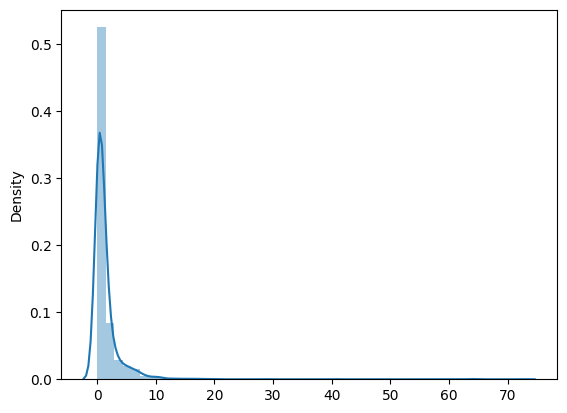

In [17]:
sns.distplot(y)
y.describe()

In [18]:
X = new_df.drop(['Total Interactions','Followers at Posting'], axis=1)
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,LOGO,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,0,1,1,0,0,0,0,green,0,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,1,0,0,0,blue,0,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,1,2,0,0,0,1,grey,0,HIGH,0,0,0,0,0,1,0,0
3,0,1,0,1,1,0,0,0,0,purple,0,HIGH,0,1,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,grey,0,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,1,1,1,1,2,0,0,0,0,cyan,1,HIGH,0,1,0,0,0,1,0,0
2566,0,0,0,0,0,1,0,0,0,blue,1,LOW,0,0,0,0,0,0,0,0
2567,0,1,1,1,2,0,0,0,0,cyan,1,HIGH,0,1,0,0,0,0,0,0
2568,1,1,0,1,2,0,0,0,0,grey,1,HIGH,0,1,0,0,0,0,1,0


In [19]:
X = pd.get_dummies(data=X)
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,0,1,1,0,0,0,0,0,...,True,False,False,False,False,False,False,False,True,False
1,0,1,1,1,2,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,1,1,1,2,0,0,0,1,0,...,False,True,False,False,False,False,False,False,True,False
3,0,1,0,1,1,0,0,0,0,0,...,False,False,False,False,True,False,False,False,True,False
4,1,1,1,0,1,0,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,1,1,1,1,2,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
2566,0,0,0,0,0,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
2567,0,1,1,1,2,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
2568,1,1,0,1,2,0,0,0,0,1,...,False,True,False,False,False,False,False,False,True,False


In [20]:
# y = (y - y.min())/(y.max() - y.min())

In [21]:
def change_types(X):
    X['dominantColor_blue'] =X['dominantColor_blue'].astype('int64')
    X['dominantColor_brown'] =X['dominantColor_brown'].astype('int64')
    X['dominantColor_cyan'] =X['dominantColor_cyan'].astype('int64')
    X['dominantColor_green'] =X['dominantColor_green'].astype('int64')
    X['dominantColor_grey'] =X['dominantColor_grey'].astype('int64')
    X['dominantColor_orange'] =X['dominantColor_orange'].astype('int64')
    X['dominantColor_pink'] =X['dominantColor_pink'].astype('int64')
    X['dominantColor_purple'] =X['dominantColor_purple'].astype('int64')
    X['dominantColor_red'] =X['dominantColor_red'].astype('int64')
    X['dominantColor_white'] =X['dominantColor_white'].astype('int64')
    X['dominantColor_yellow'] =X['dominantColor_yellow'].astype('int64')
    X['Contrast_HIGH'] =X['Contrast_HIGH'].astype('int64')
    X['Contrast_LOW'] =X['Contrast_LOW'].astype('int64')
    return X

In [22]:
X = change_types(X)
X.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
LOGO,int64


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) # Training
y_pred = rf_reg.predict(X_test) # The predicted y

In [25]:
print(metrics.mean_squared_error(y_test, y_pred))

print(metrics.median_absolute_error(y_test, y_pred))

print(metrics.mean_absolute_percentage_error(y_test, y_pred))

17.137998436285468
0.7442383847811987
3.7517691635254597


In [26]:
rf_reg.score(X_test, y_test)

-0.2319434072308506

In [27]:
for imp, name in zip(rf_reg.feature_importances_, rf_reg.feature_names_in_):
    print(name, imp)

Child 0.08332717540893385
Smile 0.0069157962648801145
Female 0.05498586060158674
Male 0.05739030899630319
PeopleNumber 0.11467015085813125
Text 0.04877910662302237
close_up 0.015341900127441804
Indoors 0.018088495415417818
Outdoors 0.04420481021203171
LOGO 0.059693295237211896
ANGRY 0.010233138465597683
CALM 0.11462360172740342
CONFUSED 0.0026011166954983214
DISGUSTED 0.0004691116611693647
FEAR 0.02155260096379557
HAPPY 0.09704569370167013
SAD 0.07264366071698652
SURPRISED 0.0061977097527107
dominantColor_blue 0.005950065729824735
dominantColor_brown 0.04574697497884193
dominantColor_cyan 0.031774853854935746
dominantColor_green 0.005375688140493168
dominantColor_grey 0.045426785668748415
dominantColor_orange 3.0845169875787916e-05
dominantColor_pink 0.00043634675181247794
dominantColor_purple 0.0017045878329556188
dominantColor_red 0.022486572899641667
dominantColor_white 0.0005869080533977069
dominantColor_yellow 0.0009601880477917134
Contrast_HIGH 0.005415713752483838
Contrast_LOW 0

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
model.score(X_test, y_test)

0.027553813951688877

## Balance dataset

In [30]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd

In [31]:
X['Targets']=y

In [32]:
X = downsample(X, 'Targets')
y = X['Targets']

<ipython-input-30-bc8664726690>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(nmin))


In [33]:
X = X.drop('Targets', axis=1)

In [34]:
X.shape

(2243, 31)

In [35]:
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2239,1,1,1,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2240,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2241,1,1,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) # Training
y_pred = rf_reg.predict(X_test) # The predicted y

In [38]:
rf_reg.score(X_test, y_test)

-0.11369845526150457

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
model.score(X_test, y_test)

-0.006176329281451398

In [41]:
important_features = pd.Series(data=rf_reg.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

,0
HAPPY,0.117008
CALM,0.105452
Text,0.084239
Male,0.081770
Child,0.072974
FEAR,0.072297
PeopleNumber,0.068326
LOGO,0.054366
Female,0.047965
SAD,0.039937


In [42]:
predictions = model.predict(X_test)

<Axes: xlabel='Targets'>

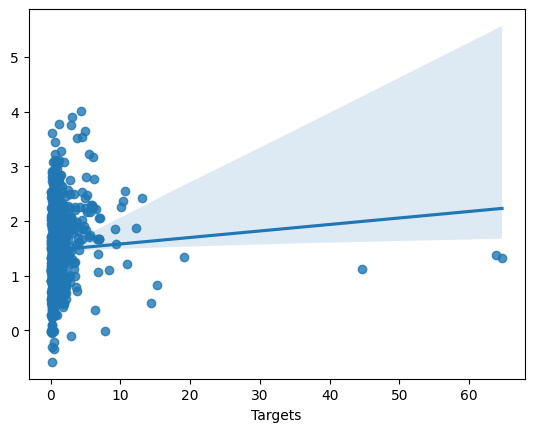

In [44]:
sns.regplot(x=y_test,y=predictions)